In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/home/ubuntu/cidds/CIDDS-001/traffic/OpenStack/CIDDS-001-internal-week1.csv")

/home/ubuntu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Date first seen,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,Flows,Flags,Tos,class,attackType,attackID,attackDescription
0,2017-03-15 00:01:16.632,0.000,TCP,192.168.100.5,445,192.168.220.16,58844.0,1,108,1,.AP...,0,normal,---,---,---
1,2017-03-15 00:01:16.552,0.000,TCP,192.168.100.5,445,192.168.220.15,48888.0,1,108,1,.AP...,0,normal,---,---,---
2,2017-03-15 00:01:16.551,0.004,TCP,192.168.220.15,48888,192.168.100.5,445.0,2,174,1,.AP...,0,normal,---,---,---
3,2017-03-15 00:01:16.631,0.004,TCP,192.168.220.16,58844,192.168.100.5,445.0,2,174,1,.AP...,0,normal,---,---,---
4,2017-03-15 00:01:16.552,0.000,TCP,192.168.100.5,445,192.168.220.15,48888.0,1,108,1,.AP...,0,normal,---,---,---


In [4]:
df['class'].value_counts()

normal      7010897
attacker     746230
victim       694393
Name: class, dtype: int64

In [5]:
df['anomalous'] = np.where(df['class'] == 'normal', 0, 1)

In [6]:
df.head()

,Date first seen,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,Flows,Flags,Tos,class,attackType,attackID,attackDescription,anomalous
0,2017-03-15 00:01:16.632,0.000,TCP,192.168.100.5,445,192.168.220.16,58844.0,1,108,1,.AP...,0,normal,---,---,---,0
1,2017-03-15 00:01:16.552,0.000,TCP,192.168.100.5,445,192.168.220.15,48888.0,1,108,1,.AP...,0,normal,---,---,---,0
2,2017-03-15 00:01:16.551,0.004,TCP,192.168.220.15,48888,192.168.100.5,445.0,2,174,1,.AP...,0,normal,---,---,---,0
3,2017-03-15 00:01:16.631,0.004,TCP,192.168.220.16,58844,192.168.100.5,445.0,2,174,1,.AP...,0,normal,---,---,---,0
4,2017-03-15 00:01:16.552,0.000,TCP,192.168.100.5,445,192.168.220.15,48888.0,1,108,1,.AP...,0,normal,---,---,---,0


In [7]:
df['anomalous'].value_counts()

0    7010897
1    1440623
Name: anomalous, dtype: int64

In [8]:
df.dtypes

Date first seen       object
Duration             float64
Proto                 object
Src IP Addr           object
Src Pt                 int64
Dst IP Addr           object
Dst Pt               float64
Packets                int64
Bytes                 object
Flows                  int64
Flags                 object
Tos                    int64
class                 object
attackType            object
attackID              object
attackDescription     object
anomalous              int64
dtype: object

In [24]:
df['Date first seen'] = pd.to_datetime(df['Date first seen'])  
df['date_delta'] = (df['Date first seen'] - df['Date first seen'].min())  / np.timedelta64(1,'D')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8451520 entries, 0 to 8451519
Data columns (total 18 columns):
Date first seen      datetime64[ns]
Duration             float64
Proto                object
Src IP Addr          object
Src Pt               int64
Dst IP Addr          object
Dst Pt               float64
Packets              int64
Bytes                object
Flows                int64
Flags                object
Tos                  int64
class                object
attackType           object
attackID             object
attackDescription    object
anomalous            int64
date_delta           float64
dtypes: datetime64[ns](1), float64(3), int64(5), object(9)
memory usage: 1.1+ GB


In [80]:
X = df.iloc[0:1000000,[1,4,6,7,9,11,16,17]]
#y = df['anomalous']
#X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [81]:
X

,Duration,Src Pt,Dst Pt,Packets,Flows,Tos,anomalous,date_delta
0,0.000,445,58844.0,1,1,0,0,9.375000e-07
1,0.000,445,48888.0,1,1,0,0,1.157407e-08
2,0.004,48888,445.0,2,1,0,0,0.000000e+00
3,0.004,58844,445.0,2,1,0,0,9.259259e-07
4,0.000,445,48888.0,1,1,0,0,1.157407e-08
...,...,...,...,...,...,...,...,...
999995,0.033,53,35034.0,2,1,0,0,5.913870e-01
999996,0.693,443,49739.0,6,1,32,0,5.913792e-01
999997,0.000,35034,53.0,2,1,0,0,5.913870e-01
999998,0.000,50202,25.0,1,1,0,0,5.913861e-01


In [82]:
X['anomalous'].value_counts()

0    881235
1    118765
Name: anomalous, dtype: int64

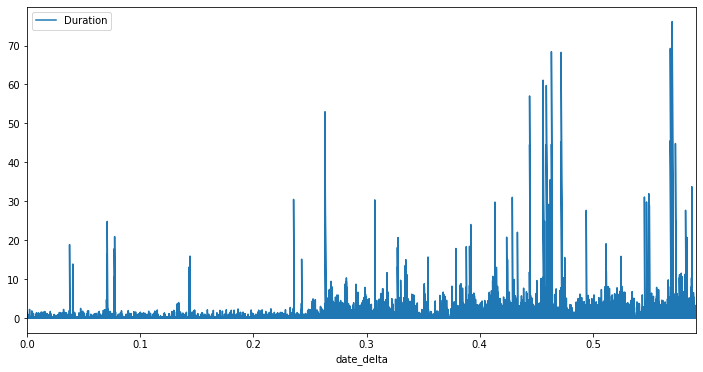

In [83]:
X.plot(x='date_delta', y='Duration', figsize=(12,6))

In [84]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
Duration      1000000 non-null float64
Src Pt        1000000 non-null int64
Dst Pt        1000000 non-null float64
Packets       1000000 non-null int64
Flows         1000000 non-null int64
Tos           1000000 non-null int64
anomalous     1000000 non-null int64
date_delta    1000000 non-null float64
dtypes: float64(3), int64(5)
memory usage: 61.0 MB


In [85]:
#train, test = train_test_split(X.loc[:,['Duration', 'date_delta', 'Packets', 'anomalous']], test_size=.2) 
train, test = train_test_split(X, test_size=.3) 
train_normal = train[train['anomalous']==0] 
train_outliers = train[train['anomalous']==1] 
outlier_prop = len(train_outliers) / len(train_normal)
scaler = StandardScaler()
np_scaled = scaler.fit_transform(train)
train = pd.DataFrame(np_scaled)
# train isolation forest
model =  IsolationForest(contamination=outlier_prop)
model.fit(train) 

/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False,
                contamination=0.13442443355757122, max_features=1.0,
                max_samples='auto', n_estimators=100, n_jobs=None,
                random_state=None, verbose=0, warm_start=False)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


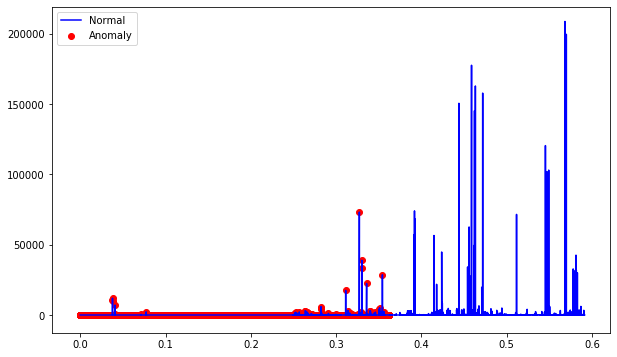

In [86]:
temp = test.sort_values('date_delta')
t1 = test.sort_values('date_delta')
temp['anomaly2'] = pd.Series(model.predict(test))

# visualization
fig, ax = plt.subplots(figsize=(10,6))

a = temp.loc[temp['anomaly2'] == -1, ['date_delta', 'Packets']] #anomaly

ax.plot(t1['date_delta'], t1['Packets'], color='blue', label = 'Normal')
ax.scatter(a['date_delta'],a['Packets'], color='red', label = 'Anomaly')
plt.legend()
plt.show();

In [87]:
y_pred = temp['anomaly2']

In [89]:
y_pred

1        -1.0
24       -1.0
22       -1.0
14       -1.0
16       -1.0
         ... 
999986    NaN
999999    NaN
999992    NaN
999996    NaN
999993    NaN
Name: anomaly2, Length: 300000, dtype: float64

In [88]:
x = test['Packets'] 
y = test['Duration'] 
colors = np.array(['#377eb8', '#ff7f00']) 
plt.scatter(x, y, alpha=0.7, c=colors[(y_pred + 1) // 2]) 
plt.xlabel('x1') 
plt.ylabel('x4')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

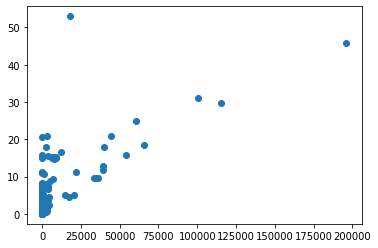

In [77]:
x = test['Packets'] 
y = test['Duration'] 
plt.scatter(x, y) 

In [78]:
y_pred_t = np.where(y_pred == -1, 1, 0)
mat = confusion_matrix(test['anomalous'], y_pred_t)
print(mat)
mat = normalize(mat, axis=1, norm='l1')

[[    0 98220]
 [    0  1780]]


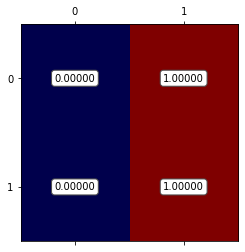

In [79]:
fig, ax = plt.subplots()
# Using matshow here just because it sets the ticks up nicely. imshow is faster.
ax.matshow(mat, cmap='seismic')

for (i, j), z in np.ndenumerate(mat):
    ax.text(j, i, '{:0.5f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

plt.show()
